Importing the **Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

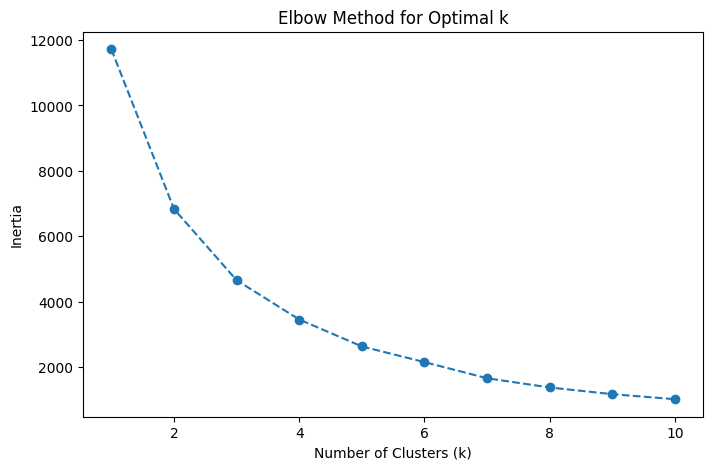

In [ ]:
df = pd.read_csv('Adornia_segmentation.csv')

X = df[['Total_Spending', 'Total_Discount']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

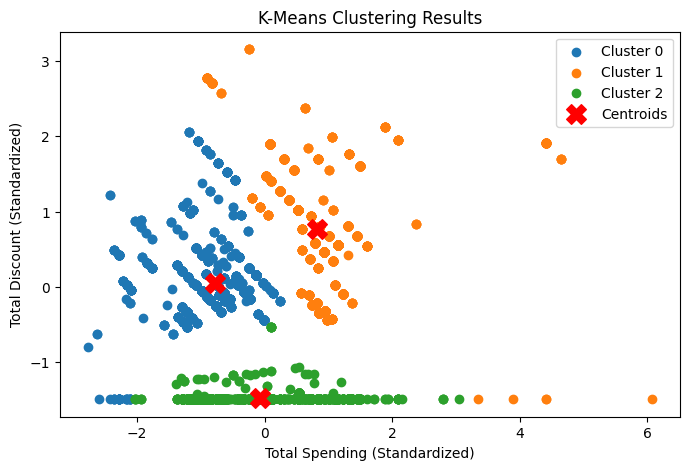

In [ ]:
optimal_k = 3

# Applying KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    plt.scatter(X_scaled[df['Cluster'] == cluster, 0],
                X_scaled[df['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Total Spending (Standardized)')
plt.ylabel('Total Discount (Standardized)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

<ipython-input-10-2ec881ab0005>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Cluster'], y=df['Total_Spending'], estimator=np.mean, palette='deep')


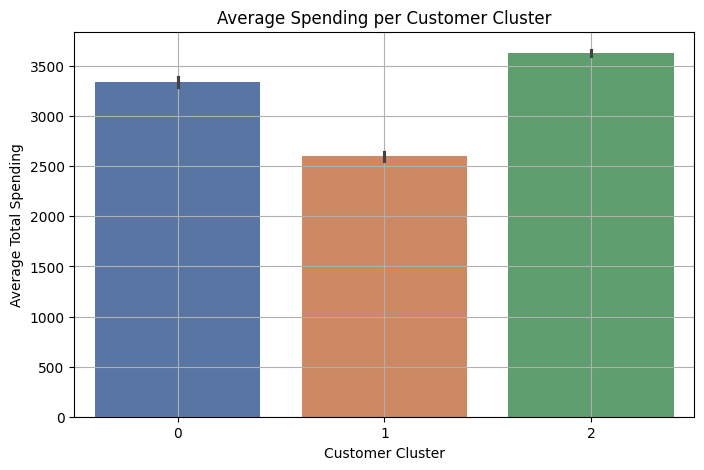

<ipython-input-10-2ec881ab0005>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['Discount_Sensitivity'], palette='coolwarm')


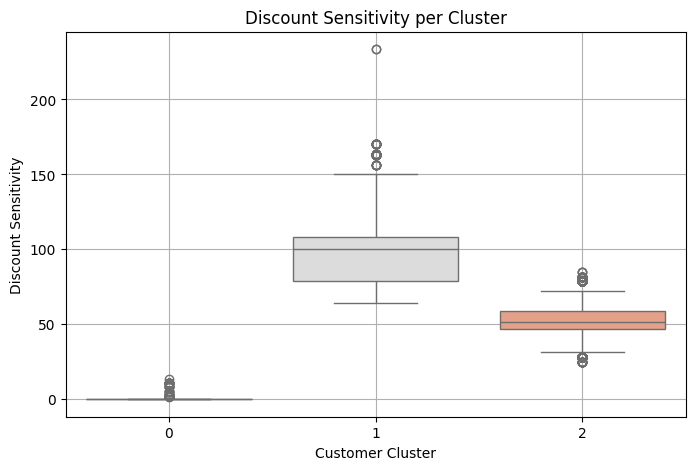

Cluster Summary:
           Customer ID  Total_Spending  Spending_Score  Total_Discount  \
Cluster                                                                 
0        1.889969e+07     3336.365433       99.623956       12.680162   
1        1.900213e+07     2599.915106       -3.342788     2631.802747   
2        1.915841e+07     3630.873307       49.023121     1831.128818   

         Discount_Sensitivity  
Cluster                        
0                    0.376044  
1                  103.342788  
2                   50.976879  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("Adornia_segmentation.csv")


features = ['Spending_Score', 'Discount_Sensitivity', 'Total_Spending']
X = df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


centroids = scaler.inverse_transform(kmeans.cluster_centers_)


# Average Spending per Customer Cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Cluster'], y=df['Total_Spending'], estimator=np.mean, palette='deep')
plt.xlabel('Customer Cluster')
plt.ylabel('Average Total Spending')
plt.title('Average Spending per Customer Cluster')
plt.grid(True)
plt.show()


# Box Plot of Discount Sensitivity per Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cluster'], y=df['Discount_Sensitivity'], palette='coolwarm')
plt.xlabel('Customer Cluster')
plt.ylabel('Discount Sensitivity')
plt.title('Discount Sensitivity per Cluster')
plt.grid(True)
plt.show()


cluster_summary = df.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)


df.to_csv("Customer_Segments.csv", index=False)
